# Merge Sort

In [7]:
from IPython.display import Image
import os

os.chdir(os.path.abspath(os.path.join(os.getcwd(), 'static')))

<b>References and resources:</b>
- Python Data Structures and Algorithms by Benjamin Baka
- [YouTube: Python: MergeSort algorithm](https://www.youtube.com/watch?v=Nso25TkBsYI)<sup>[1]</sup>
- [YouTube: Merge sort in 3 minutes](https://www.youtube.com/watch?v=4VqmGXwpLqc&list=PL9xmBV_5YoZOZSbGAXAPIq1BeUf4j20pl&index=4)
- https://www.geeksforgeeks.org/merge-sort/
- [Wikipedia](https://en.wikipedia.org/wiki/Merge_sort)

- https://scotchka.github.io/blog/html/2018/11/15/stackless_merge_sort.html

<sub>[1] [code](https://github.com/joeyajames/Python/blob/master/Sorting%20Algorithms/merge_sort.py)<sub>

Merge sort is a divide and conquer algorithm. It's done recursively.

Conceptually, a merge sort works as follows:

 - 1. Divide the unsorted list into n sublists, each containing 1 element (a list of 1 element is considered sorted).
 - 2. Repeatedly merge sublists to produce new sorted sublists until there is only 1 sublist remaining. This will be the sorted list.


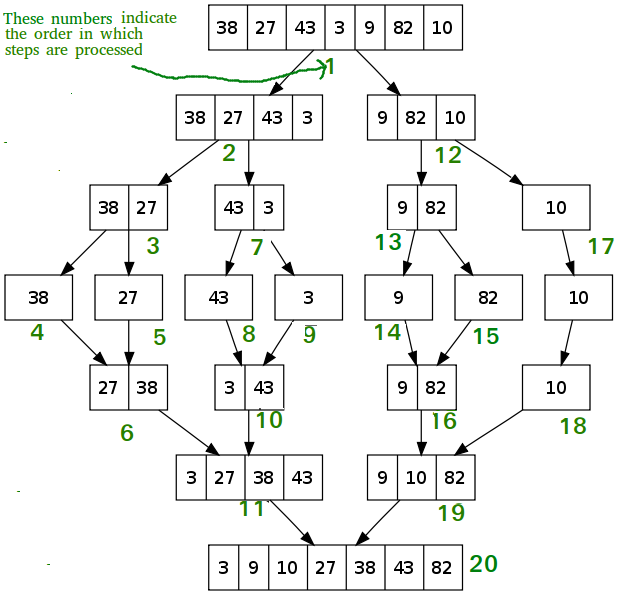

In [8]:
Image(filename='merge_sort.png')

In [ ]:
# # Uncomment to use inline pythontutor

# from IPython.display import IFrame

# IFrame('http://www.pythontutor.com/visualize.html#mode=display', height=750, width=750)

In [10]:
import sys

def merge_sort(lst):
    merge_sort2(lst, 0, len(lst)-1)
    return lst
    
def merge_sort2(lst, first, last):
    if first < last:
        middle = (first + last)//2
        merge_sort2(lst, first, middle)
        merge_sort2(lst, middle+1, last)
        merge(lst, first, middle, last)
        
def merge(lst, first, middle, last):
    L = lst[first:middle+1]
    R = lst[middle+1:last+1]
    L.append(sys.maxsize)
    R.append(sys.maxsize)
    i = j = 0
    
    for k in range (first, last+1):
        if L[i] <= R[j]:
            lst[k] = L[i]
            i += 1
        else:
            lst[k] = R[j]
            j += 1
            
lst = [38, 27, 43, 3, 9, 82, 10]
print(lst)
merge_sort(lst)

[38, 27, 43, 3, 9, 82, 10]


[3, 9, 10, 27, 38, 43, 82]

# Stackless merge sort

Merge sort divides a list into smaller lists of one or zero items, which are trivially sorted, and then merges them pairwise until one list remains. Here is a typical recursive implementation:

In [5]:
def mergesort(lst):

    if len(lst) < 2:
        return lst[:]

    mid = len(lst) // 2

    return merge(mergesort(lst[:mid]), mergesort(lst[mid:]))

Note that the base case returns a copy, not the original list, to be consistent with the general behavior. The merge function is:

In [6]:
def merge(left, right):

    merged = []

    while left and right:
        if left[0] <= right[0]:
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))

    merged.extend(left)
    merged.extend(right)

    return merged

For simplicity, we use pop(0) which is inefficient but easily remedied with indexing.

Instead of dividing the list recursively, we can put each item into a list by itself, and then merge them iteratively:

In [7]:
def mergesort_stackless(lst):

    queue = [[item] for item in lst]

    while len(queue) >= 2:
        left = queue.pop()
        right = queue.pop()
        merged = merge(left, right)
        queue.insert(0, merged)

    return queue[0]

We maintain the individual lists in a queue. In each iteration, we take two lists from the queue, merge them, and put the combined list back in the queue. Eventually just one list remains, which is the desired result. The queue ensures that smaller lists are merged before larger ones, so that the pair being merged does not become too different in size - unbalanced pairs would degrade runtime.

Checking a test case:

In [8]:
lst = [3, 2, 1, 4, 5]
mergesort_stackless(lst)

[1, 2, 3, 4, 5]